We were interested in using eigenvalues to maybe observe the perturbations by the adversary, but we found than even on simple adversaries the eigenvalues are not very informative. If they were, random walks could estimate eigenvalues (with some limits https://arxiv.org/abs/2307.00474) and then using those eigenvalues we could estimate the perturbations.

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

from basic import generate_erdos_renyi_graph, compute_modified_laplacians

In [2]:
def find_eigen(G, k):
    # L = nx.laplacian_matrix(G).toarray()
    A = nx.adjacency_matrix(G).toarray()
    A = np.linalg.matrix_power(A, k)
    eigvals, eigvecs = np.linalg.eig(A)
    return eigvals, eigvecs

/Users/geo/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


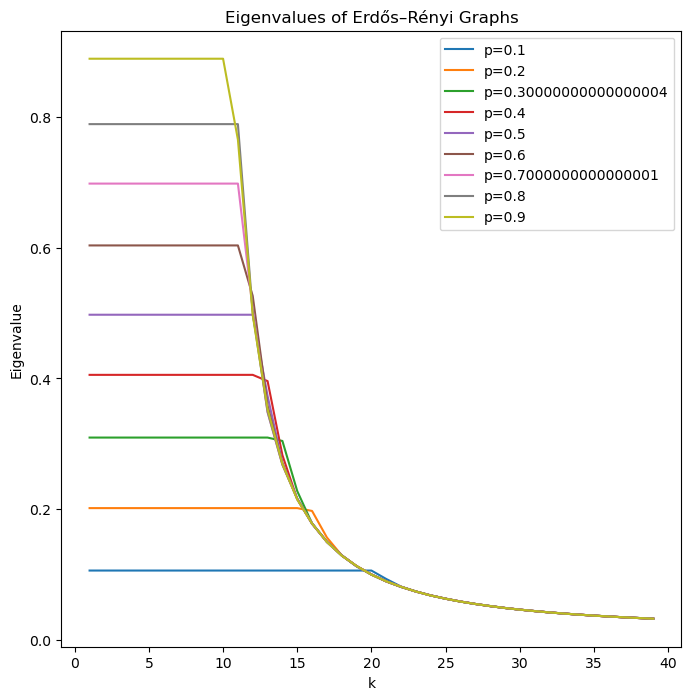

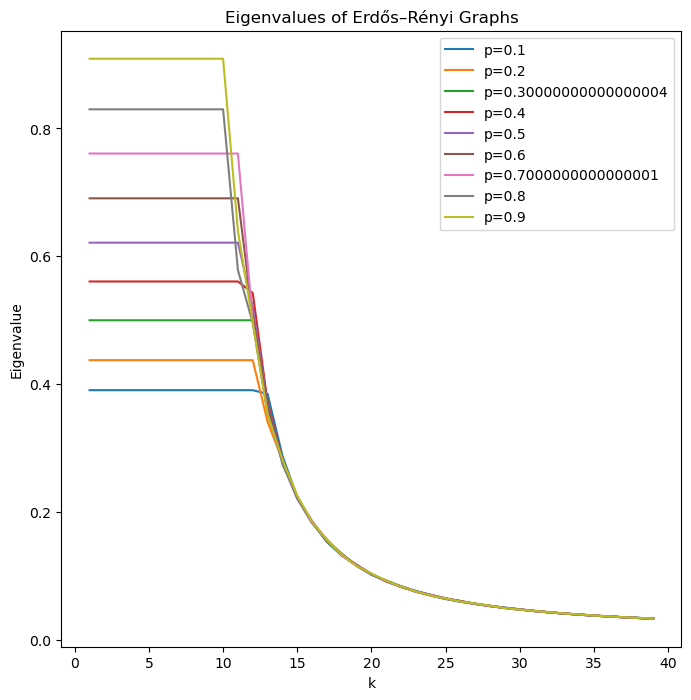

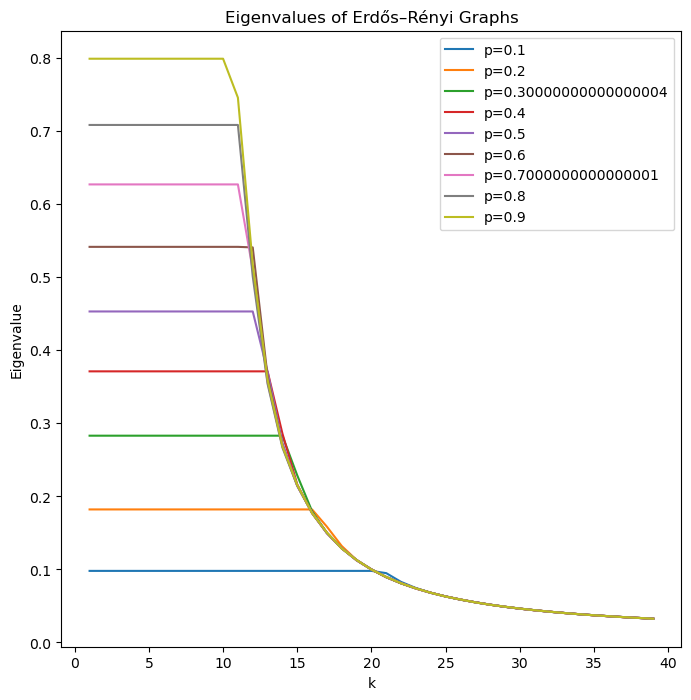

In [3]:
def check_max_eigenvalue():
    def plot_eigenvalues(data):
        plt.figure(figsize=(8, 8))
        for p, values in data.items():
            plt.plot(range(1, 40), values, label=f"p={p}")
        plt.xlabel("k")
        plt.ylabel("Eigenvalue")
        plt.title("Eigenvalues of Erdős–Rényi Graphs")
        plt.legend()
        plt.show()

    n = 100
    egian_data1 = {
        p: [] for p in np.arange(0.1, 1, 0.1)
    }
    egian_data2 = {
        p: [] for p in np.arange(0.1, 1, 0.1)
    }
    egian_data3 = {
        p: [] for p in np.arange(0.1, 1, 0.1)
    }
    for p in np.arange(0.1, 1, 0.1):
        G = generate_erdos_renyi_graph(n, p)
        G_prime, G_double_prime = compute_modified_laplacians(G, 0.1)
        for k in range(1, 40):
            eigvals1, _ = find_eigen(G, k)
            eigvals2, _ = find_eigen(G_prime, k)
            eigvals3, _ = find_eigen(G_double_prime, k)
            # print(f"p={p} k={k} Eigenvalues: {np.power(np.max(eigvals), 1 / k) / n}")
            egian_data1[p].append(np.power(np.max(eigvals1), 1 / k) / n)
            egian_data2[p].append(np.power(np.max(eigvals2), 1 / k) / n)
            egian_data3[p].append(np.power(np.max(eigvals3), 1 / k) / n)
    plot_eigenvalues(egian_data1)
    plot_eigenvalues(egian_data2)
    plot_eigenvalues(egian_data3)

check_max_eigenvalue()